In [11]:
from pacbedclient import query
from ncempy.io import dm
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Select test PACBEDS
filenames = ['./pacbed_files/rutile_80kV_1.dm4',
            './pacbed_files/rutile_80kV_2.dm4',
            './pacbed_files/rutile_80kV_3.dm4']

Case 0: OK
Case 1: OK
Case 2: OK


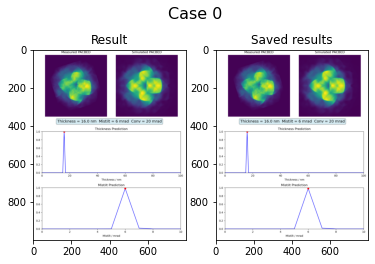

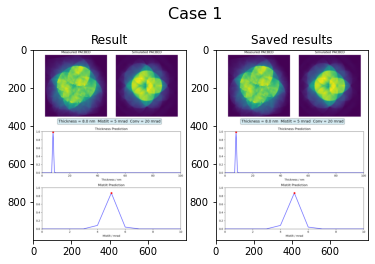

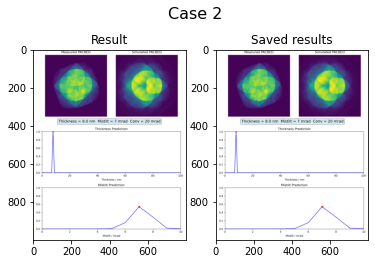

In [65]:
for i in range(0, len(filenames)):
    # Load PACBED
    fname_Pacbed = filenames[i]
    PACBED=dm.dmReader(fname_Pacbed)
    
    # Make prediction with loaded PACBED
    img_arr = validation_img_arr = query(PACBED['data'], 
                                         crystal_structure='Rutile_200', 
                                         acceleration_voltage=80000,
                                         convergence_angle=20, 
                                         zone_u=0, zone_v=0, zone_w=1,
                                         host='localhost', port=8000)
    
    # Load reference results
    img_val = np.load(fname_Pacbed[:-4] + '.npy', allow_pickle=True)
    img_val = img_val.item()
    
    # Check for same results
    state = 'OK'
    keys = list(img_arr.keys())
    for key in keys:
        if not np.array_equal(img_arr[key], img_val[key]):
            state = 'Failure'
            break
    print(f'Case {i}: {state}')
    
    # Plot validation images for comparison
    fig, (ax1, ax2) = plt.subplots(1, 2)
    
    ax1.imshow(img_arr['validation'])
    ax2.imshow(img_val['validation'])
    
    ax1.set_title('Calculated results')
    ax2.set_title('Reference results')
    
    fig.suptitle(f'Case {i}', fontsize=16)

# Create and Save Test Cases

In [62]:
for i in range(0, len(filenames)):
    fname_Pacbed = filenames[i]
    
    PACBED=dm.dmReader(fname_Pacbed)
    img_arr = validation_img_arr = query(PACBED['data'], 
                                         crystal_structure='Rutile_200', 
                                         acceleration_voltage=80000,
                                         convergence_angle=20, 
                                         zone_u=0, zone_v=0, zone_w=1,
                                         host='localhost', port=8000)
    
    np.save(fname_Pacbed[:-4] + '.npy', img_arr)